# Linear Regression Bike Sharing Assignment
## Step1. Reading & Understanding the data
    * Adjusting Screen Width
    * Importing libraries
    * Reading the data into dataframe
    * Inpsecting the Dataframe
    * Null value check
    * Data quality check
    * Duplicate value check
    * Removing redundant Columns

## Step2. EDA & Data Visualization
    * Visualization of binary columns
    * Converting categorical variables
    * Categorical Variable Analysis with target variable cnt
    * Numerical variable analysis

## Step3. Data Preparation
    * Dummy variable creation
    * Concatenation of data frames
    * Removing unnecessary variables

## Step4. Split the data into Train and Test Dataset
    * Train & Test data split
    * Rescaling bike train data
    * Checking correlation coefficient
    
## Step5. Building the Linear Model
    * Divide into X_train and y_train
    * Recursive Feature Elimination
    * Build Model using statsmodel
  
## Step6. Validation of Model
    * Linear Relationship
    * Homoscedasticity
    * Absence of Multicolinearity
    * independence of residuals
    * Normality of error

## Step7. Making Predications using final model
    * Divide X_test and y_test

## Step8. Evaluation of the Mdoel

## Conclusion

### Adjust Screen Width


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Supress Warnings


In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Import Required Python Libraries


In [2]:
# Importing numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing Machine Learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###  Step 1: Reading & Understanding the data
 

In [3]:

# Input data files are available in google drive
# connecting colab with google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [4]:
# unzip the day.zip file to colab content
!unzip /content/drive/MyDrive/ml_bike_sharing/day.zip

Archive:  /content/drive/MyDrive/ml_bike_sharing/day.zip
  inflating: day/day.csv             


#### Note: From the Readme.txt file, I understood that the field 'dteday' is a date. So,parsing it as a date type while importing the bike data


##### i.Importing the Data


In [5]:
bikes_df = pd.read_csv("/content/day/day.csv", parse_dates=['dteday'])

##### ii.Inspecting the Dataframe


In [6]:
# Displaying the top 5 rows of the dataframe
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Displaying the last 5 rows of the dataframe
bikes_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,2019-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,2019-12-31,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [8]:
#Verify the shape of the dataframe 
bikes_df.shape

(730, 16)

#####Note: The dataframe has 730 rows and 16 columns


In [9]:
# Verify the size of the dataframe
bikes_df.size

11680

In [10]:
# Verify the types of each data type column exists and total memory usage
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
# Describe the numerical columns data distribution statistics
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###### Insight: 
      Except date type, all other are either float or integer type.
      There are some fields that are categorical in nature, but are in integer/float type. Example :  season, weathersit mnth 
      We have to analyze and decide whether to convert them to categorical or treat as integer.  


##### iii. Null Values Check

In [12]:
# Null values check
bikes_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Insight: data doesn't have any null values

#####iv. Data Quality check


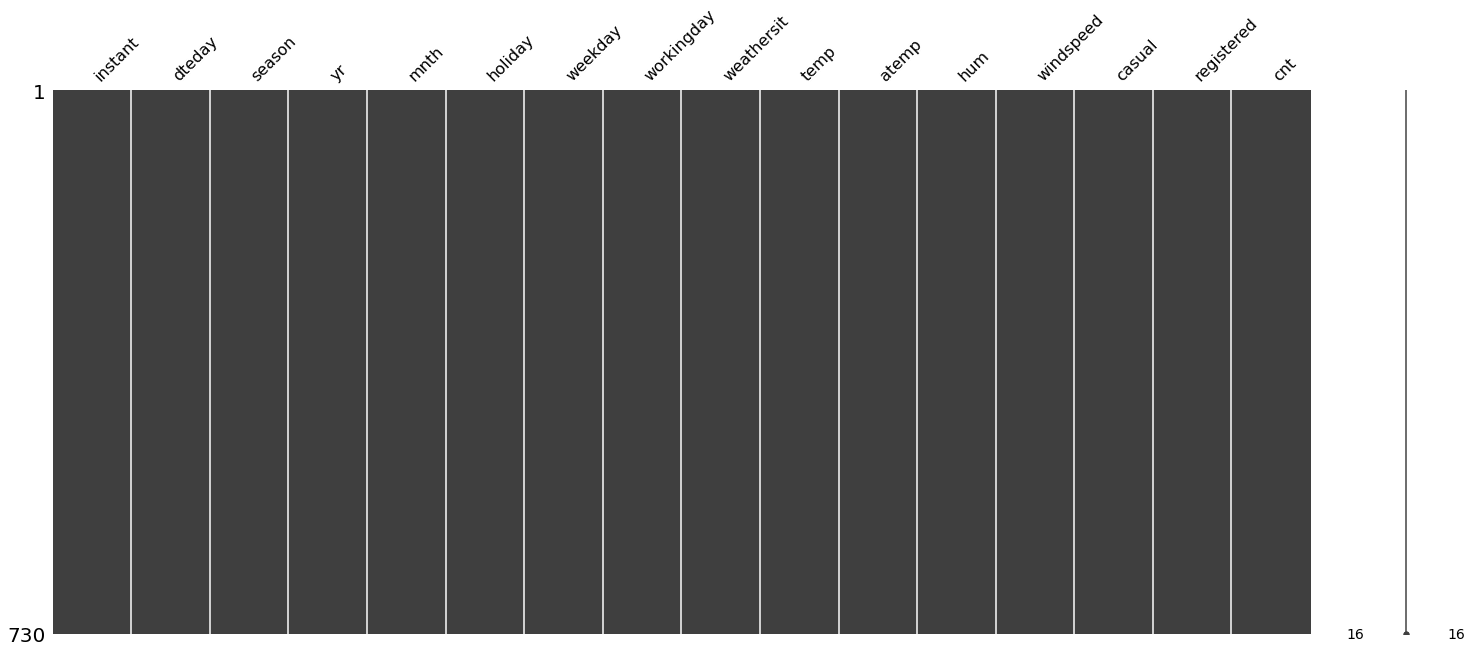

In [11]:
# Check if there are any missing values in the dataset

import missingno as mn
mn.matrix(bikes_df)

##### Insight: There are no missing values in any of the columns and rows.   


##### V. Duplicate values check


In [13]:
# Creating a copy of original dataframe for duplicate check
bikes_dup_df = bikes_df

# Checking for duplicates and dropping the entire duplicate row if any
bikes_dup_df.drop_duplicates(subset=None, inplace=True)
bikes_dup_df.shape

(730, 16)

##### Vi. Removing Redundant columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

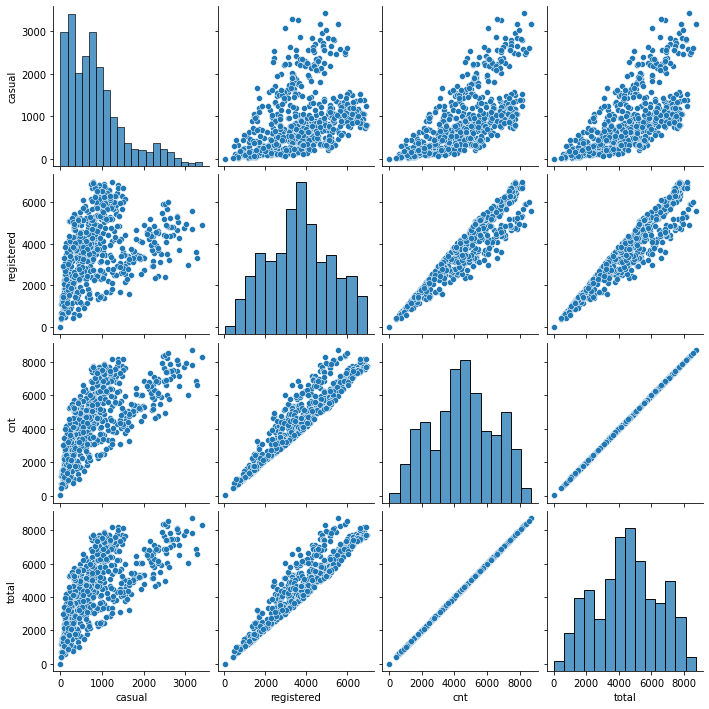

In [14]:
# Verify the relationship between casual, registered and cnt column
bikes_cnt_rel = bikes_df[['casual','registered','cnt']]
# Creating a column which will show the value of casual + registered
bikes_cnt_rel['total'] = bikes_cnt_rel['casual'] + bikes_cnt_rel ['registered']
sns.pairplot(bikes_cnt_rel)
plt.show

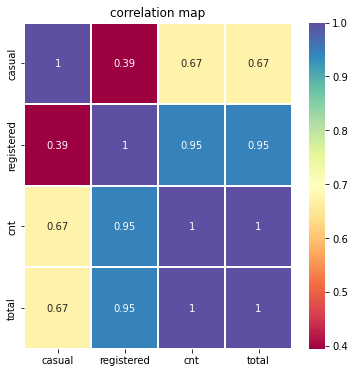

In [16]:
# Checking the correlation of the variables 
plt.figure(figsize = (6,6))
ax= sns.heatmap(bikes_cnt_rel.corr(), annot = True, cmap="Spectral",linewidth =1)
plt.title("correlation map")
plt.show()

###### Insight: It is observed that instant , dteday, casual and registered identified as redudant columns. so these columns can be droped
  

In [17]:
#Dropping the unnecessary columns
bikes_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bikes_df.shape

(730, 12)

#### Step 2: EDA & Visualizing the data


#####i. Visualization of binary columns

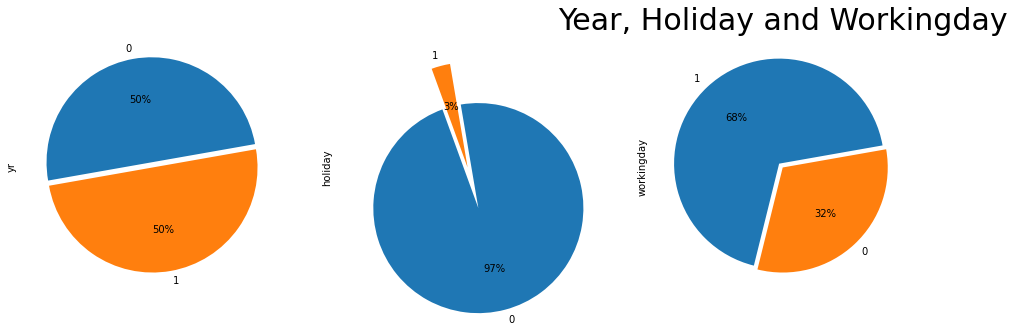

In [23]:
plt.figure(figsize = [16,15])
plt.subplot(131)
bikes_df['yr'].value_counts(normalize = True).plot.pie(explode=(0.05, 0), autopct = "%1.0f%%", startangle=10)
plt.subplot(132) 
bikes_df['holiday'].value_counts(normalize = True).plot.pie(explode=(0.4, 0), autopct = "%1.0f%%", startangle=110)
plt.subplot(133)
bikes_df['workingday'].value_counts(normalize = True).plot.pie(explode=(0.05, 0),autopct = "%1.0f%%", startangle=10)
plt.title('Year, Holiday and Workingday',fontsize=30)
plt.show()

##### Insight: 'Yr' is expected to be 50%-50% daily records of bike usage.  Less number of holidays(1) as compared to non-holidays(0) hence bike usage is more in 0. Same applies to 'workingday' due to higher number of days vs non-working days.

 ##### ii. Converting Categorical Variables

In [18]:
#Converting season
bikes_df.season.replace((1,2,3,4), ('W1_Spring','W2_Summer','W3_Fall','W4_Winter'), inplace=True)
bikes_df.season.value_counts(normalize=True)

W3_Fall      0.257534
W2_Summer    0.252055
W1_Spring    0.246575
W4_Winter    0.243836
Name: season, dtype: float64

In [19]:
#Converting mnth
bikes_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bikes_df.mnth.value_counts(normalize=True)

Jan    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [20]:
#Converting weathersit
bikes_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bikes_df.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [21]:
#Converting weathersit
bikes_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bikes_df.weekday.value_counts(normalize=True)

Saturday     0.143836
Sunday       0.143836
Monday       0.143836
Tuesday      0.142466
Thursday     0.142466
Friday       0.142466
Wednesday    0.141096
Name: weekday, dtype: float64

#####iii. Categorical Variable Analysis with target variable cnt


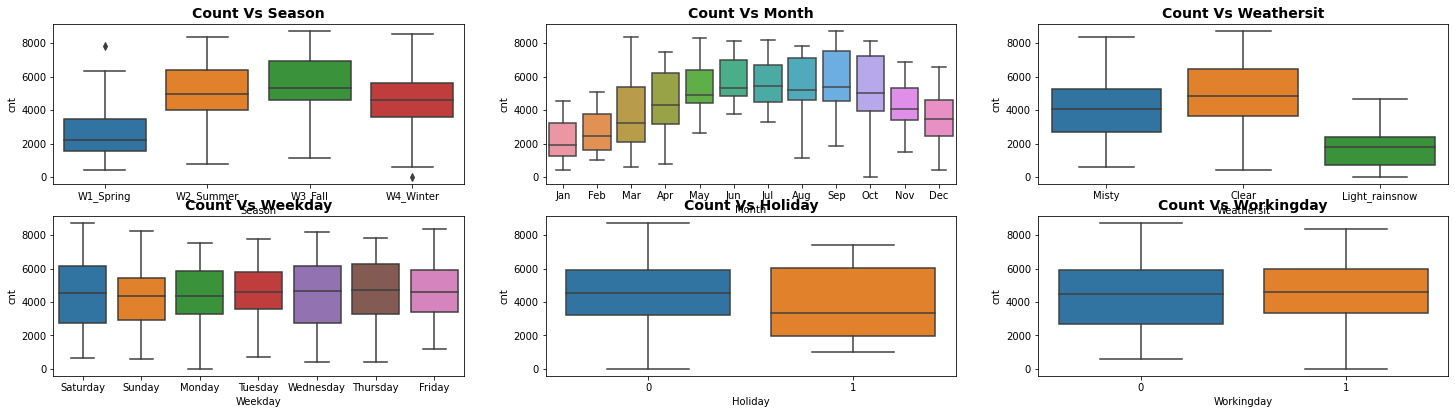

In [24]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_df)
plt.xlabel('Season')
plt.title ('Count Vs Season',fontsize =14, fontweight ='bold')
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes_df)
plt.xlabel('Month')
plt.title ('Count Vs Month',fontsize =14, fontweight ='bold')
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_df)
plt.xlabel('Weathersit')
plt.title ('Count Vs Weathersit',fontsize =14, fontweight ='bold')
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_df)
plt.xlabel('Weekday')
plt.title ('Count Vs Weekday',fontsize =14, fontweight ='bold')
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_df)
plt.xlabel('Holiday')
plt.title ('Count Vs Holiday',fontsize =14, fontweight ='bold')
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_df)
plt.xlabel('Workingday')
plt.title ('Count Vs Workingday',fontsize =14, fontweight ='bold')
plt.show()

In [25]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = bikes_df.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bikes_df.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bikes_df.cnt.count()*100
    return round(cat_df,2)

In [26]:
# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bikes_df)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bikes_df, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

###### Season :


In [27]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
W3_Fall,1061129,5644.30,188,32.24,25.75
W2_Summer,918589,4992.33,184,27.91,25.21
W4_Winter,841613,4728.16,178,25.57,24.38
W1_Spring,469514,2608.41,180,14.27,24.66


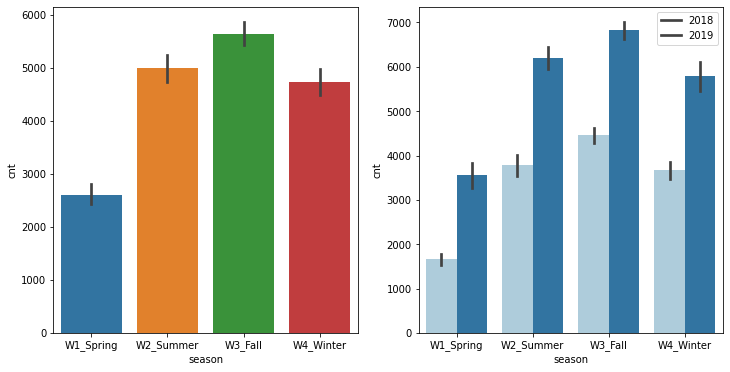

In [ ]:
categorical_plot('season',12,6)

Insight: Most of the bike booking were happening in Fall with a median of over 5000 bookings (for two years). It is followed by Summer & Winter with less % of total booking. It indicates that the season can be a good predictor of the dependent variable.


##### Month :


In [ ]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


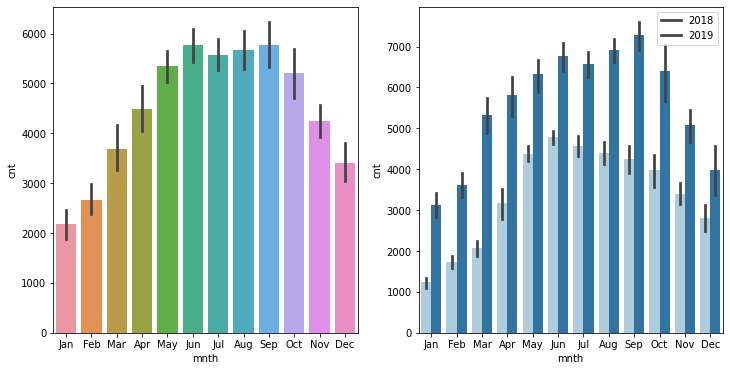

In [ ]:
categorical_plot('mnth',12,6)

###### Insight: Almost 10% of the bike booking was happening in the months' May to Sep with a median of over 4000 bookings per month. It indicates that the mnth has some trend for bookings and can be a good predictor for the dependent variable. 


###### Weather:


In [ ]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


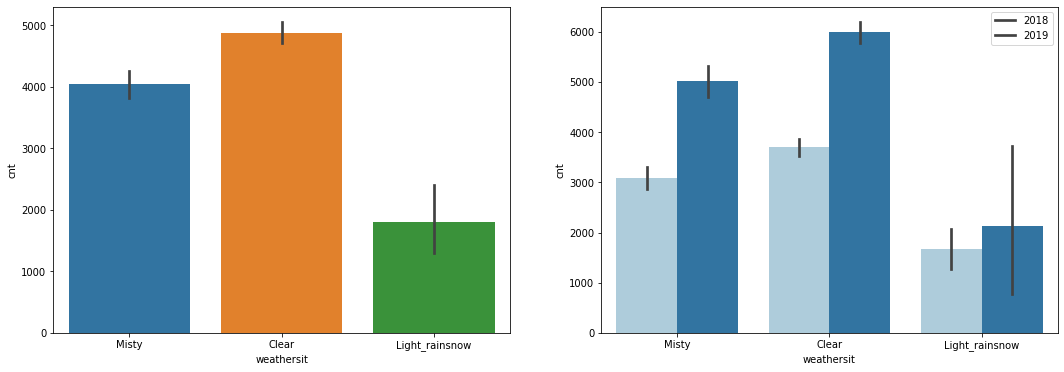

In [ ]:
categorical_plot('weathersit',18,6)

###### Insight: Most of the bike booking was happening during Clear weather with a median of close to 5000 bookings (for two years). This was followed by Misty with 30% of the total booking. It indicates that the weathersit does show some trend towards the bike bookings, and it can be a good predictor for the dependent variable. The current data frame does not have any data where the weather is Heavy_RainSnow

###### Weekday :


In [ ]:
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Friday,487790,4690.29,104,14.82,14.25
Thursday,485395,4667.26,104,14.75,14.25
Saturday,477807,4550.54,105,14.52,14.38
Wednesday,471214,4574.89,103,14.32,14.11
Tuesday,469109,4510.66,104,14.25,14.25
Monday,455503,4338.12,105,13.84,14.38
Sunday,444027,4228.83,105,13.49,14.38


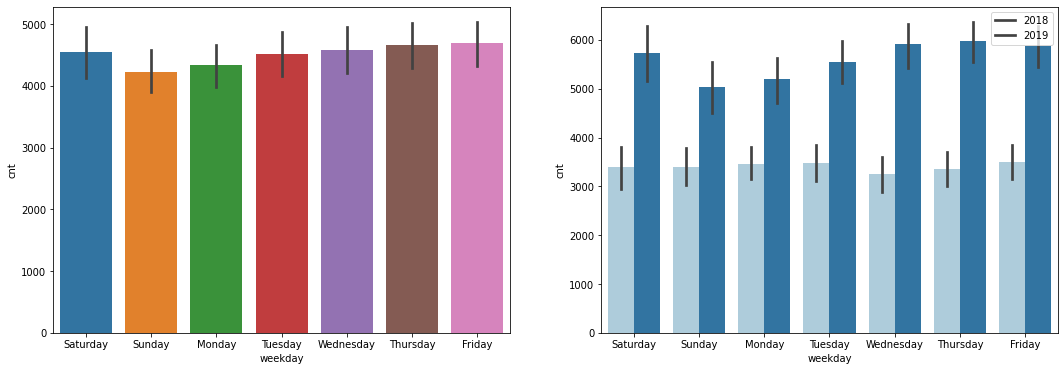

In [ ]:
categorical_plot('weekday',18,6)

###### Insight: weekday variable shows the very close trend having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence on the predictor. Further analysis would be needed to determine whether this attribute needs to be included in the model parameter selection 
 

##### Holiday :


In [ ]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


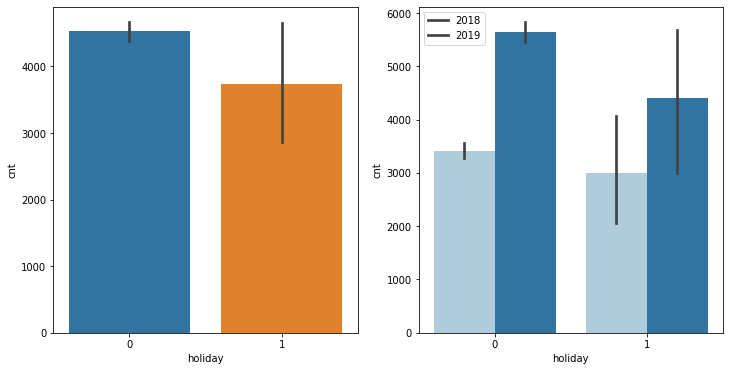

In [ ]:
categorical_plot('holiday',12,6)

##### Insight: Above 95% of bike rentals are happening during non-holiday time.


##### Working Day :


In [ ]:
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2290576,4590.33,499,69.6,68.36
0,1000269,4330.17,231,30.4,31.64


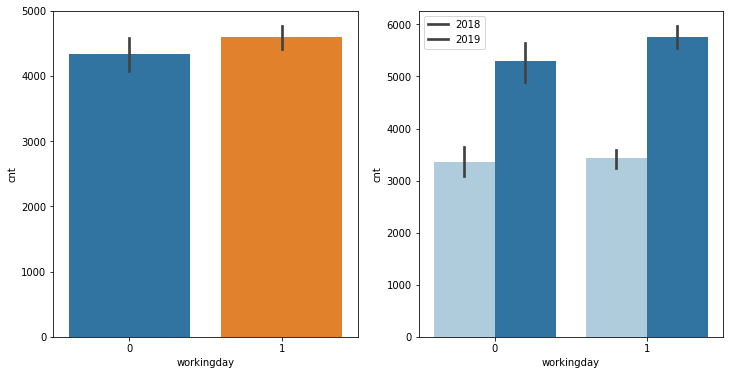

In [ ]:
categorical_plot('workingday',12,6)

##### Insight: > 60%  of the bike booking were happening in 'workingday' with a median of close to 5000 bookings (for two years). It indicates that the workingday can be a good predictor of the dependent variable
  

##### Year :


In [ ]:
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


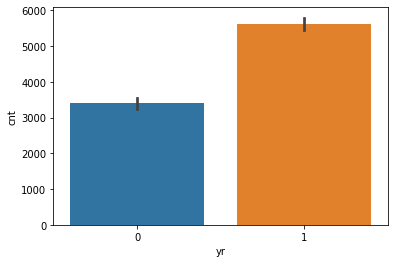

In [ ]:
sns.barplot('yr','cnt',data=bikes_df)
plt.show()

###### Insight: Bike rental demand has increased more from 2018 to 2019


##### iv. Numerical Variable Analysis


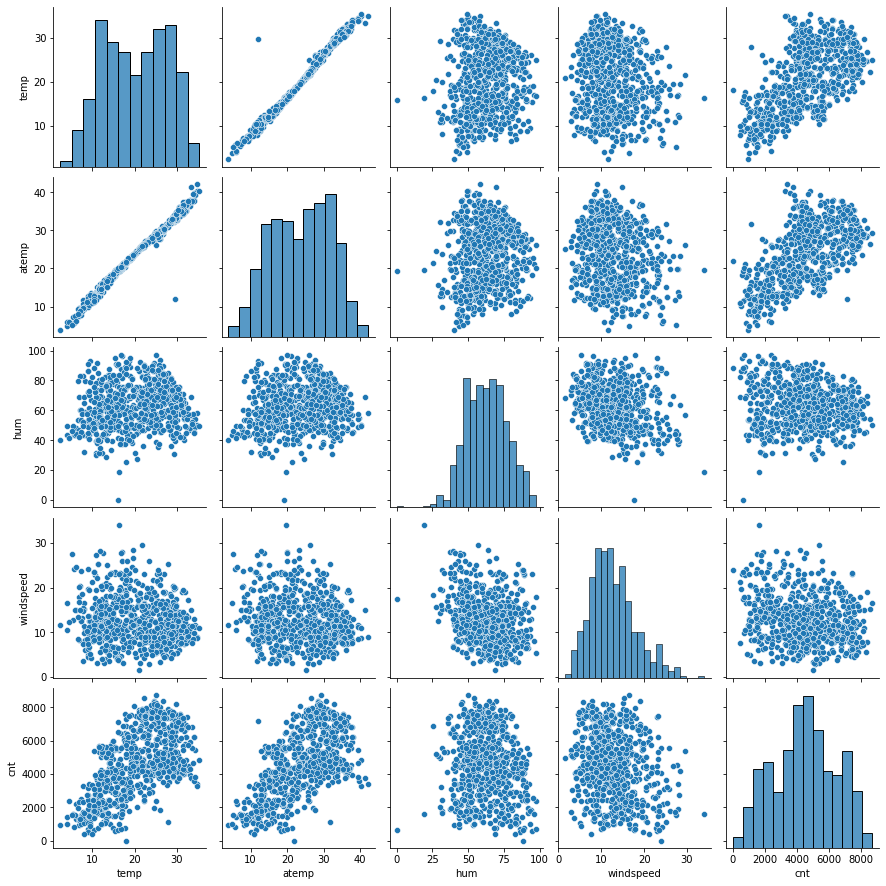

In [28]:
#Generating pairplot to check the relationships between numeric variables variables
bikes_numerical = bikes_df[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bikes_numerical)
plt.show()

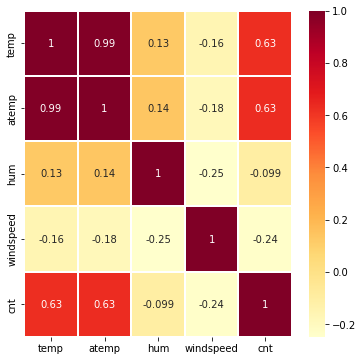

In [29]:
# Checking the correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (6,6))
ax= sns.heatmap(bikes_numerical.corr(), annot = True, cmap="YlOrRd",linewidth =1)

#####Insight: There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables  


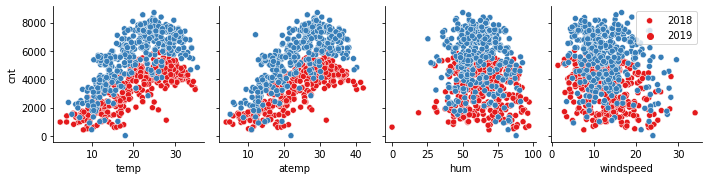

In [30]:
# Checking the impact of year against the numerical variable : 
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bikes_df, hue='yr', palette='Set1')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

##### Insight: All the parameters have increased values in 2019 compared to 2019. Thus, year may become a key paratemeter in the model  


#### Step 3: Data Preparation


##### i. Dummy Variable Creation for the 'season','weather', 'month','weekday

<span style='font-family:Georgia'>
    <p> Season </p>
</span>

In [31]:
season = pd.get_dummies(bikes_df['season'], drop_first = True)
season.head(5)

,W2_Summer,W3_Fall,W4_Winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


<span style='font-family:Georgia'>
    <p> Weather </p>
</span>

In [32]:
weather = pd.get_dummies(bikes_df['weathersit'], drop_first = True)
weather.head(5)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


<span style='font-family:Georgia'>
    <p> Month </p>
</span>

In [33]:
month = pd.get_dummies(bikes_df['mnth'], drop_first = True)
month.head(5)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


<span style='font-family:Georgia'>
    <p> Weekday </p>
</span>

In [35]:
weekday = pd.get_dummies(bikes_df['weekday'], drop_first = True)
weekday.head(5)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


#####ii. Concatenate the Dataframes


In [36]:
# Creating a new dataframe called bike_new where season, month, weather and weekday dataframe is being added
bikes_merged = pd.concat([bikes_df,season,month,weather,weekday], axis = 1)
bikes_merged.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,W1_Spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,1,0,0,0,0
1,W1_Spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,0,0,0
2,W1_Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0


In [37]:
bikes_merged.shape

(730, 34)

In [38]:
bikes_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  W2_Summer       730 non-null    uint8  
 13  W3_Fall         730 non-null    uint8  
 14  W4_Winter       730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

##### iii. Removing unnecessary variables


In [39]:
#deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
bikes_merged.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bikes_merged.shape

(730, 30)

In [40]:
bikes_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   W2_Summer       730 non-null    uint8  
 9   W3_Fall         730 non-null    uint8  
 10  W4_Winter       730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

##### Insight: All the columns are now as numeric value. The dataframe is ready now for splitting into Train & Test dataframes

####  Step 4: Splitting the data into Train & Test Dataset


##### i. Train & Test Split


In [45]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train_data, bike_test_data = train_test_split(bikes_merged, train_size = 0.7, random_state = 100)

<span style='font-family:Georgia'>
    <p> Verifying the train - test split and new dataframe details </p>
</span>

In [46]:
bike_train_data.shape

(510, 30)

In [47]:
bike_train_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255,0.247059,0.262745,...,0.084314,0.080392,0.029412,0.345098,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077,0.431725,0.440557,...,0.278131,0.272166,0.169124,0.475867,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
bike_test_data.shape

(220, 30)

In [ ]:
bike_test_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,20.553817,24.040727,63.749086,12.745665,4540.236364,0.268182,0.245455,...,0.086364,0.081818,0.036364,0.322727,0.154545,0.127273,0.150000,0.172727,0.145455,0.118182
std,0.501120,0.198531,0.466833,7.533926,8.188064,13.790510,5.184271,1911.199159,0.444023,0.431338,...,0.281541,0.274713,0.187620,0.468586,0.362295,0.334038,0.357886,0.378873,0.353363,0.323559
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.189577,17.366525,53.260450,9.041851,3193.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,24.762725,63.687500,12.146128,4593.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.119778,30.903325,73.333350,15.643227,5959.750000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Insight: Observed that based on the 70% - 30% split between train and test dataset we have 510 rows in train dataset and 220 in test dataset

##### ii. Rescalling bike_train_data dataframe

In [49]:
# Rescaling using MinMaxScaler
scaler = MinMaxScaler()

In [50]:
#Dataframe before scaling 
bike_train_data.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,1,0,1,0,0,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train_data[num_vars] = scaler.fit_transform(bike_train_data[num_vars])

In [52]:
#Verifing after rescalling applied
bike_train_data.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,1,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,1,0,0,0,0,0,0


##### iii. Checking Correlation Coefficient


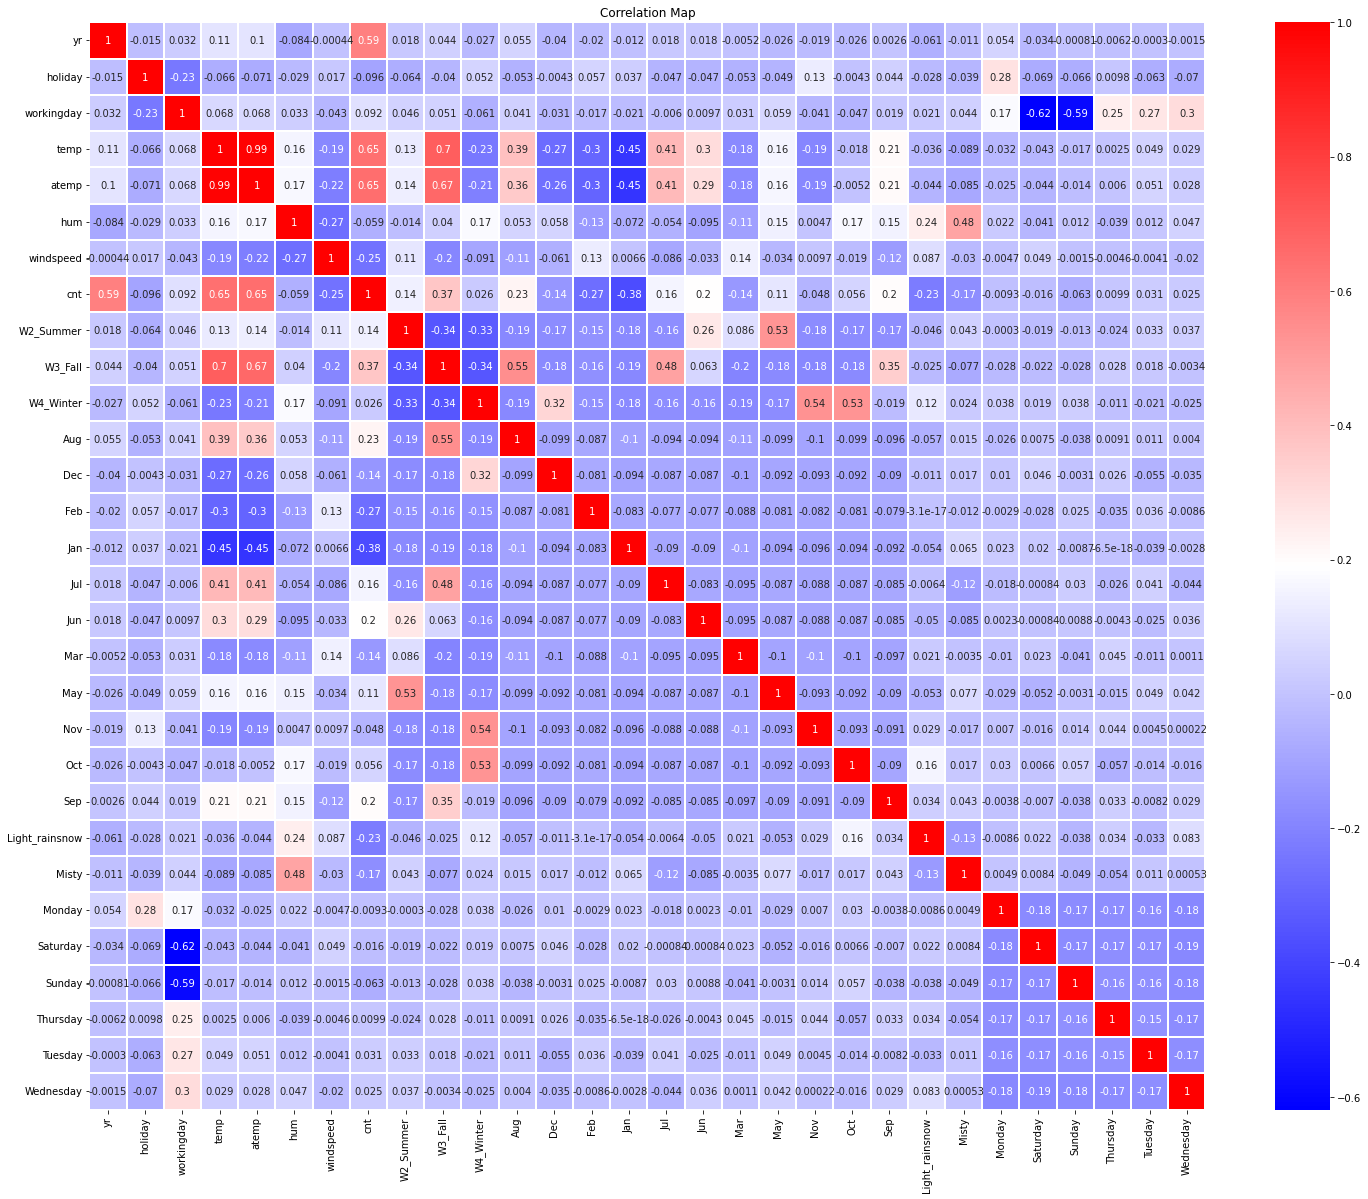

In [54]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train_data.corr(), annot = True, cmap="bwr",linewidth =1)
plt.title("Correlation Map")
plt.show()

###### Insight: Observed that there is multi-colinearity between the variables. We need to consider the factors while developing the model. Temp and atemp has very high correlation value of 0.99. Thus, we can use only one of these two variables. workingday variable has high negative correlation with Sat & Sun (where workingday =0). Spring is negatively correlated with cnt 

#### Step 5: Building the Linear Model


##### i. Divide into X_train and y_train


In [55]:
y_train = bike_train_data.pop('cnt')
X_train = bike_train_data

###### ii. Recursive Feature Elimination

In [56]:
# Running RFE with the output number of the variable equal to 15
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('W2_Summer', True, 1),
 ('W3_Fall', True, 1),
 ('W4_Winter', True, 1),
 ('Aug', False, 8),
 ('Dec', True, 1),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', False, 6),
 ('Jun', False, 9),
 ('Mar', False, 7),
 ('May', False, 14),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 13),
 ('Saturday', False, 3),
 ('Sunday', True, 1),
 ('Thursday', False, 12),
 ('Tuesday', False, 15),
 ('Wednesday', False, 10)]

In [57]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'W2_Summer',
       'W3_Fall', 'W4_Winter', 'Jan', 'Jul', 'Sep', 'Light_rainsnow', 'Misty',
       'Saturday'],
      dtype='object')

In [58]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [59]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

###### iii. Build Model using statsmodel


In [61]:
# Function for Calculating VIF

def calcVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

###### Model 1


In [62]:
print(X_train_rfe)

     yr  holiday  workingday      temp       hum  windspeed  W2_Summer  \
576   1        0           1  0.815169  0.725633   0.264686          0   
426   1        0           0  0.442393  0.640189   0.255342          0   
728   1        0           0  0.245101  0.498067   0.663106          0   
482   1        0           0  0.395666  0.504508   0.188475          1   
111   0        0           1  0.345824  0.751824   0.380981          1   
..   ..      ...         ...       ...       ...        ...        ...   
578   1        0           1  0.863973  0.679690   0.187140          0   
53    0        0           1  0.202618  0.435939   0.111379          0   
350   0        0           0  0.248216  0.577930   0.431816          0   
79    0        0           1  0.462664  0.759870   0.529881          1   
520   1        0           1  0.600225  0.632030   0.359599          1   

     W3_Fall  W4_Winter  Jan  Jul  Sep  Light_rainsnow  Misty  Saturday  
576        1          0    0    1    

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calcVIF(X_train_rfe)

,Features,VIF
3,temp,24.84
4,hum,20.35
7,W3_Fall,7.26
2,workingday,5.10
5,windspeed,3.89
6,W2_Summer,3.64
8,W4_Winter,2.89
13,Misty,2.15
0,yr,2.06
14,Saturday,1.92


In [64]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr_m1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr_m1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.22e-191
Time:                        18:25:59   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2010      0.030      6.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


######   Model 2


###### Insight: Both temp and atemp has high VIF but atemp has high p-value additionally. We can go ahead and drop the atemp from the equation

In [90]:
X_train_new = X_train_rfe.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calcVIF(X_train_new)

,Features,VIF
3,temp,16.46
6,W3_Fall,7.11
2,workingday,4.72
4,windspeed,3.78
5,W2_Summer,3.64
7,W4_Winter,2.65
0,yr,2.06
13,Saturday,1.85
9,Jul,1.60
12,Misty,1.57


In [91]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.22e-191
Time:                        19:06:41   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2010      0.030      6.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### Model 3

In [92]:
X_train_new = X_train_new.drop(['W3_Fall'], axis = 1)
# Run the function to calculate VIF for the new model
calcVIF(X_train_new)

,Features,VIF
3,temp,6.83
2,workingday,4.71
4,windspeed,3.67
0,yr,2.05
12,Saturday,1.85
5,W2_Summer,1.83
11,Misty,1.57
6,W4_Winter,1.56
8,Jul,1.53
7,Jan,1.31


In [93]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.6
Date:                Tue, 10 May 2022   Prob (F-statistic):          6.40e-188
Time:                        19:06:58   Log-Likelihood:                 506.55
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     496   BIC:                            -925.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1075      0.022      4.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


######   Model 4
######Insight: Now we will remove holiday as it has high VIF


In [94]:
X_train_new = X_train_new.drop(['holiday'], axis = 1)
# Run the function to calculate VIF for the new model
calcVIF(X_train_new)

,Features,VIF
2,temp,6.64
1,workingday,4.31
3,windspeed,3.59
0,yr,2.05
4,W2_Summer,1.83
11,Saturday,1.75
10,Misty,1.57
5,W4_Winter,1.54
7,Jul,1.53
6,Jan,1.29


In [95]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.66e-188
Time:                        19:07:12   Log-Likelihood:                 504.33
No. Observations:                 510   AIC:                            -982.7
Df Residuals:                     497   BIC:                            -927.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0984      0.021      4.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### Model 5
######Insight: Now we will remove wokringday

In [96]:
X_train_new = X_train_new.drop(['workingday'], axis = 1)
# Run the function to calculate VIF for the new model
calcVIF(X_train_new)

,Features,VIF
1,temp,5.16
2,windspeed,3.37
0,yr,2.04
3,W2_Summer,1.82
9,Misty,1.54
6,Jul,1.52
4,W4_Winter,1.50
7,Sep,1.29
5,Jan,1.22
10,Saturday,1.18


In [97]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.1
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.82e-184
Time:                        19:08:11   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -959.5
Df Residuals:                     498   BIC:                            -908.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1401      0.020      7.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###### Model 6

##### Insight:Now we will remove windspeed


In [98]:
X_train_new = X_train_new.drop(['windspeed'], axis = 1)
# Run the function to calculate VIF for the new model
calcVIF(X_train_new)

,Features,VIF
1,temp,4.08
0,yr,2.01
2,W2_Summer,1.77
8,Misty,1.52
5,Jul,1.51
3,W4_Winter,1.46
6,Sep,1.28
9,Saturday,1.16
4,Jan,1.13
7,Light_rainsnow,1.06


In [99]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     221.8
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.68e-176
Time:                        19:09:20   Log-Likelihood:                 471.09
No. Observations:                 510   AIC:                            -920.2
Df Residuals:                     499   BIC:                            -873.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0653      0.017      3.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [100]:
# Note down final model varibales and its coefficients

# assign final model to lr_final
lr_final = lr6

# Note down and check final model variables
var_final = list(lr_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varibles
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lr_final.params,3))

Final Selected Variables: ['yr', 'temp', 'W2_Summer', 'W4_Winter', 'Jan', 'Jul', 'Sep', 'Light_rainsnow', 'Misty', 'Saturday']

Coefficent for the variables are:
const             0.065
yr                0.232
temp              0.579
W2_Summer         0.072
W4_Winter         0.124
Jan              -0.032
Jul              -0.037
Sep               0.094
Light_rainsnow   -0.295
Misty            -0.075
Saturday          0.020
dtype: float64


#### Insight: This model looks good, as there seems to be very low Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model 

#### The equation of best fitted surface based on model lr6:         cnt=0.065 + (0.232 x yr) +  (0.579 x temp) + (0.072 x W2_Summer) +  (0.124 x W4_Winter) - (0.032 x Jan) - (0.037 x Jul) + (0.094 x Sep) − (0.295 x Light_rainsnow)  − (0.075 x Misty) + (0.020 x Saturday)


####  Step 6: Validation of Model

###### i. Linear Relationship

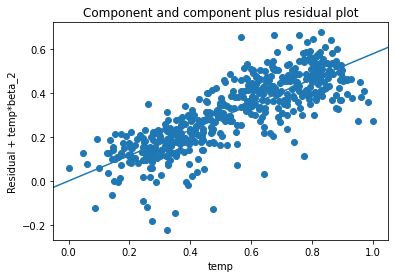

In [101]:
sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

###### Insight: The above plots represent the relationship between the model and the predictor variables. As we can observe that linearity is well preserved

######  ii. Homoscedasticity
 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


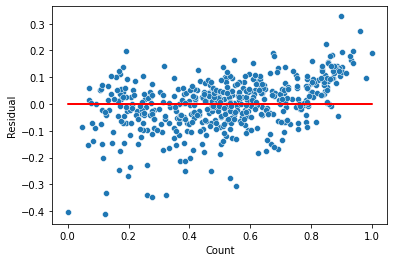

In [104]:
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

###### Insight:  There is no visible pattern in residual values, thus homoscedacity is well preserved

###### iii. Absence of Multicolinearity

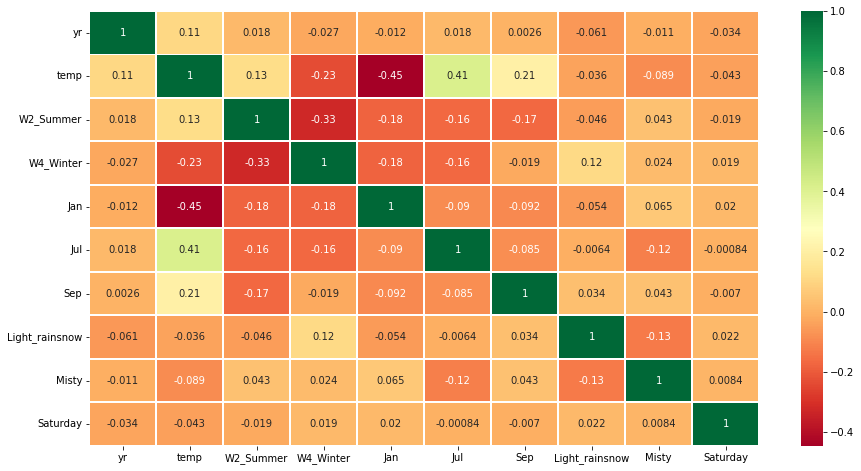

In [105]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [107]:
# Run the function to calculate VIF for the final model
calcVIF(X_train_new)

,Features,VIF
1,temp,4.08
0,yr,2.01
2,W2_Summer,1.77
8,Misty,1.52
5,Jul,1.51
3,W4_Winter,1.46
6,Sep,1.28
9,Saturday,1.16
4,Jan,1.13
7,Light_rainsnow,1.06


###### Insight: All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables.

######  iv.  Independence of residuals : Autocorrelation refers to the fact that observations’ errors are correlated. To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables. 0 – 2: positive auto-correlation.  2 – 4: negative auto-correlation)


In [108]:
print('The Durbin-Watson value for Final Model lr 6 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 6 is 2.0056


###### Insight: There is almost no autocorrelation


###### v. Normality of error 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


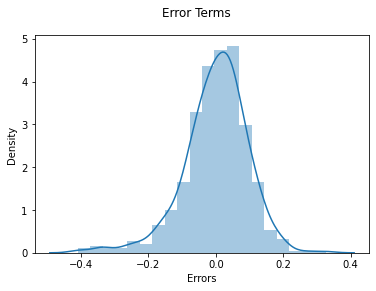

In [109]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

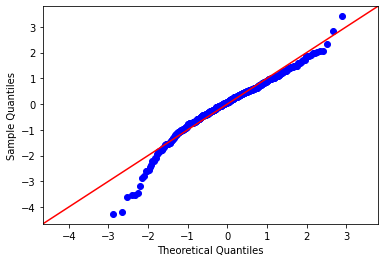

In [110]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

###### Insight: Observed that based on the histogram, we can conclude that error terms are following a normal distribution.

####    Step 7: Making Predictions using final model
######   i. Scaling bike_test dataframe             

###### Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data.In other words, we want to prevent the information leak from train to test dataset. 

In [111]:

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test_data[num_vars] = scaler.transform(bike_test_data[num_vars])
bike_test_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,1,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


In [112]:
bike_test_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.086364,0.086364,0.027273,0.318182,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.281541,0.281541,0.163248,0.466833,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### ii. Dividing X_test and y_test            


In [113]:
y_test = bike_test_data.pop('cnt')
X_test = bike_test_data

In [115]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lr6 = sm.add_constant(X_test)

X_test_lr6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   temp            220 non-null    float64
 3   W2_Summer       220 non-null    uint8  
 4   W4_Winter       220 non-null    uint8  
 5   Jan             220 non-null    uint8  
 6   Jul             220 non-null    uint8  
 7   Sep             220 non-null    uint8  
 8   Light_rainsnow  220 non-null    uint8  
 9   Misty           220 non-null    uint8  
 10  Saturday        220 non-null    uint8  
dtypes: float64(2), int64(1), uint8(8)
memory usage: 8.6 KB


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [122]:
y_pred = lr6.predict(X_test_lr6)

####   Step 8: Evaluation of Model

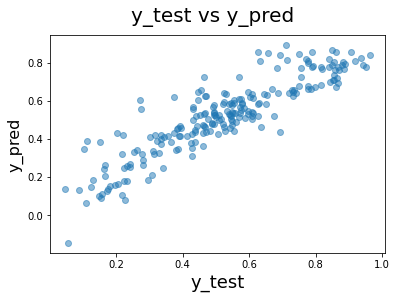

In [123]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [124]:
# print R-Squared from test dataset
from sklearn.metrics import r2_score
#r2_score(y_test, y_pred)
r2_score(y_test, y_pred)

0.797741690498141

In [127]:
r2=0.797741690498141

In [125]:
X_test.shape

(220, 10)

In [128]:
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.788064259421497

#### Conclusion      
##### As per the final model, the top 3 predictor variables that influences bike booking are: 
###### Temperature (Temp) A coefficient value of ‘0.579’ indicated that a temperature has significant impact on bike rentals 

###### Year (yr)  A coefficient value of ‘0.232’ indicated that a year wise the rental numbers are increasing

###### Light Rain & Snow (weathersit =3) A coefficient value of ‘-0.295’ indicated that the light snow and rain deters people from renting out bikes

###### It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals. 
  